# Proyek Analisis Data Lagu spotify

## Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import os
import seaborn as sns

## Data Wrangling

In [ ]:
lagu_data = pd.read_csv("/content/Spotify-2000.csv")
lagu_data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


## Assessing Data

#### Menilai tabel `lagu_data`

In [ ]:
lagu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
lagu_data.isna().sum()

,0
Index,0
Title,0
Artist,0
Top Genre,0
Year,0
Beats Per Minute (BPM),0
Energy,0
Danceability,0
Loudness (dB),0
Liveness,0


terdapat 3 tabel kosong di dalam kolum year

In [ ]:
print("Jumlah duplikasi: ", lagu_data.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi

In [ ]:
lagu_data.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


## Cleaning Data

#### Membersihkan tabel `lagu_data`

In [ ]:
lagu_data['Length (Duration)'] = pd.to_numeric(lagu_data['Length (Duration)'], errors='coerce')

mengubah tipe daya yang ada di kolum `Length (Duration)` yang dari object di ubah menjadi numeric (float)

In [ ]:
lagu_data['Year'] = lagu_data['Year'].astype(int)

mengubah tipe data yang ada di kolum `year`yang dari nya float di ubah ke int

In [ ]:
lagu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1994 non-null   object 
 2   Artist                  1994 non-null   object 
 3   Top Genre               1994 non-null   object 
 4   Year                    1994 non-null   int64  
 5   Beats Per Minute (BPM)  1994 non-null   int64  
 6   Energy                  1994 non-null   int64  
 7   Danceability            1994 non-null   int64  
 8   Loudness (dB)           1994 non-null   int64  
 9   Liveness                1994 non-null   int64  
 10  Valence                 1994 non-null   int64  
 11  Length (Duration)       1990 non-null   float64
 12  Acousticness            1994 non-null   int64  
 13  Speechiness             1994 non-null   int64  
 14  Popularity              1994 non-null   

tipe data sudah terperbaiki

In [ ]:
lagu_data['Length (Duration)'] = (lagu_data['Length (Duration)'] / 60).round(2)

di kolum `Length (Duration)` saya mengkonversi durasi dari detik ke menit.

In [ ]:
lagu_data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,3.35,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,3.45,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,5.68,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,4.48,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,4.27,1,3,59


In [ ]:
lagu_data.isna().sum()

,0
Index,0
Title,0
Artist,0
Top Genre,0
Year,0
Beats Per Minute (BPM),0
Energy,0
Danceability,0
Loudness (dB),0
Liveness,0


di karenan konversi tadi menyebab kan bebebapa kolum data itu jadi kosong

In [ ]:
lagu_data[lagu_data['Year'].isna()]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity


In [ ]:
lagu_data.loc[lagu_data['Title'] == 'Fix You', 'Year'] = 2005
lagu_data.loc[lagu_data['Title'] == 'Miracle', 'Year'] = 2008
lagu_data.loc[lagu_data['Title'].str.contains('7 Seconds'), 'Year'] = 1994

mengisi kolum tahun yang kosong sesuai dengan tahun rilis lagu nya

In [ ]:
lagu_data.loc[lagu_data['Title'] == 'Echoes', 'Length (Duration)'] = 23.34
lagu_data.loc[lagu_data['Title'].str.contains('Close to the Edge'), 'Length (Duration)'] = 18.42
lagu_data.loc[lagu_data['Title'].str.contains('Autobahn'), 'Length (Duration)'] = 22.48
lagu_data.loc[lagu_data['Title'] == 'Get Ready', 'Length (Duration)'] = 21.32


sama seperti dengan yang atas mengisi kolum kosong pada durasi dengan durasi yang sesuai lagunya

In [ ]:
lagu_data[lagu_data['Length (Duration)'].isna()]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity


In [ ]:
lagu_data.isna().sum()

,0
Index,0
Title,0
Artist,0
Top Genre,0
Year,0
Beats Per Minute (BPM),0
Energy,0
Danceability,0
Loudness (dB),0
Liveness,0


In [ ]:
lagu_data.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.987964,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,4.373445,28.858074,4.994985,59.52658
std,575.762538,16.114177,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,1.554845,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,1.550000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.530000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,4.080000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,4.820000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,23.340000,99.000000,55.000000,100.00000


In [ ]:
lagu_data['Speechiness'] = lagu_data['Speechiness'] / 100

mengubah isi dalam kolom Speechiness dengan membaginya dengan 100 untuk menyesuaikan skala nilainya menjadi 0–1, sesuai dengan standar representasi fitur audio pada Spotify.

In [ ]:
lagu_data['Speechiness'].describe()

,Speechiness
count,1994.000000
mean,0.049950
std,0.044016
min,0.020000
25%,0.030000
50%,0.040000
75%,0.050000
max,0.550000


In [ ]:
def tempo_category(bpm):
    if bpm < 90:
        return 'Slow'
    elif bpm <= 130:
        return 'Medium'
    else:
        return 'Fast'

lagu_data['Tempo_Category'] = lagu_data['Beats Per Minute (BPM)'].apply(tempo_category)

membuat Kolom Tempo_Category dibuat untuk mengklasifikasikan lagu berdasarkan BPM menjadi tiga kelas: Slow (BPM < 90), Medium (90–130), dan Fast (BPM > 130)

In [ ]:
lagu_data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Tempo_Category
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,3.35,94,0.03,71,Fast
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,3.45,17,0.07,39,Fast
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,5.68,2,0.17,69,Fast
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,4.48,0,0.04,76,Fast
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,4.27,1,0.03,59,Medium


In [ ]:
lagu_data.to_csv("lagu_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore `lagu_data`

In [ ]:
lagu_data.sample(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Tempo_Category
575,576,Under The Pressure,The War On Drugs,chamber pop,2014,134,71,33,-7,13,19,8.87,31,0.03,60,Fast
1630,1631,Zombie,The Cranberries,irish rock,1994,167,64,31,-9,37,31,5.10,2,0.03,80,Fast
42,43,Take Me Out,Franz Ferdinand,alternative rock,2004,105,68,28,-9,14,49,3.95,0,0.04,74,Medium
980,981,Sailing,Rod Stewart,adult standards,1975,129,37,43,-10,32,19,4.63,37,0.03,68,Medium
278,279,Munich,Editors,alternative dance,2005,149,88,18,-4,32,39,3.77,0,0.05,61,Fast


In [ ]:
# Hitung jumlah lagu unik per genre (dari kolom 'Top Genre')
lagu_data.groupby(by="Top Genre")["Title"].nunique().sort_values(ascending=False)

,Title
Top Genre,
album rock,413
adult standards,121
dutch pop,87
alternative rock,86
dance pop,83
...,...
cyberpunk,1
contemporary vocal jazz,1
compositional ambient,1


In [ ]:
# Analisis Genre Musik - Jumlah Lagu Unik dan Statistik Audio per Genre
lagu_data.groupby(by="Top Genre").agg({
    "Title": "nunique",        #
    "Energy": ["max", "min", "mean"],
    "Danceability": ["max", "min", "mean"],
    "Popularity": "mean"
}).sort_values(by=("Title", "nunique"), ascending=False)

Title Energy                Danceability      \
                        nunique    max min       mean          max min   
Top Genre                                                                
album rock                  413     98   6  59.549637           91  15   
adult standards             121     97   3  42.658537           88  16   
dutch pop                    87     95   8  57.045455           87  18   
alternative rock             86     97  10  69.209302           79  22   
dance pop                    83     96  14  64.457831           86  24   
...                         ...    ...  ..        ...          ...  ..   
cyberpunk                     1     30  30  30.000000           43  43   
contemporary vocal jazz       1     62  62  62.000000           88  88   
compositional ambient         1     24  24  24.000000           61  61   
classical rock                1     33  33  33.000000           38  38   
yacht rock                    1     92  92  92.000000           74  74   

                                   Popularity  
                              mean       mean  
Top Genre                                      
album rock               51.411622  60.694915  
adult standards          49.162602  62.577236  
dutch pop                51.147727  45.238636  
alternative rock         48.534884  66.941860  
dance pop                60.650602  68.518072  
...                            ...        ...  
cyberpunk                43.000000  61.000000  
contemporary vocal jazz  88.000000  63.000000  
compositional ambient    61.000000  28.000000  
classical rock           38.000000  39.000000  
yacht rock               74.000000  64.000000  

[149 rows x 8 columns]

In [ ]:
# Hitung lagu unik per tahun, urutkan dari tahun terbaru
lagu_data.groupby(by="Year")["Title"].nunique().sort_index(ascending=False)

,Title
Year,
2019,21
2018,52
2017,45
2016,35
2015,42
...,...
1961,1
1960,1
1959,3


In [ ]:
lagu_terbanyak = lagu_data['Artist'].value_counts().head(10)
print(lagu_terbanyak)

Artist
Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
Bruce Springsteen     23
Michael Jackson       23
ABBA                  22
David Bowie           21
Fleetwood Mac         18
Name: count, dtype: int64


In [ ]:
# Cek apakah ada lagu dengan judul sama dari artis berbeda
lagu_data.duplicated(subset=["Title", "Artist"], keep=False).sum()

0

In [ ]:
lagu_data.groupby(by="Tempo_Category")["Title"].count()

,Title
Tempo_Category,
Fast,642
Medium,1077
Slow,275


In [ ]:
# Kategorikan lagu berdasarkan durasi (pendek, medium, panjang)
lagu_data["duration_category"] = pd.cut(
    lagu_data["Length (Duration)"],
    bins=[0, 3, 5, float('inf')],
    labels=["Pendek (<3 menit)", "Medium (3-5 menit)", "Panjang (>5 menit)"]
)

# Hitung jumlah lagu per kategori
lagu_data["duration_category"].value_counts()

,count
duration_category,
Medium (3-5 menit),1389
Panjang (>5 menit),412
Pendek (<3 menit),193


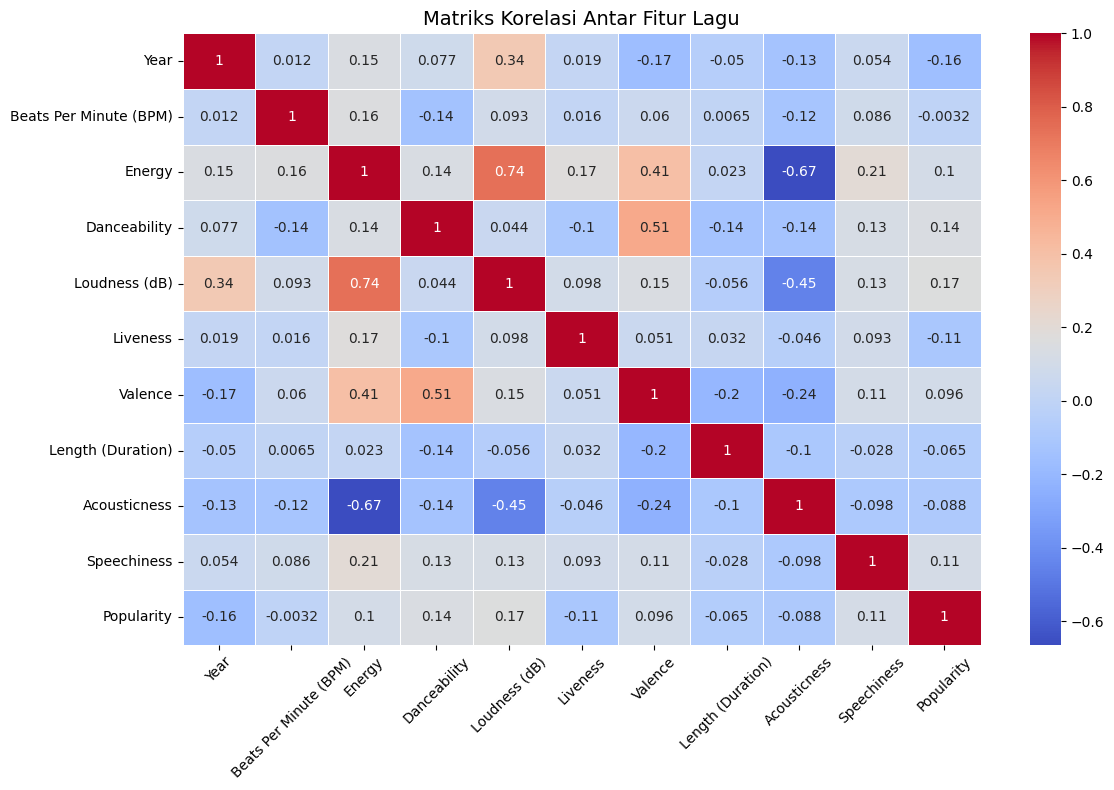

In [ ]:
kolom_numerik = [
    'Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability',
    'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)',
    'Acousticness', 'Speechiness', 'Popularity'
]

korelasi = lagu_data[kolom_numerik].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur Lagu', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

## Pertanyaan 1: Genre mana yang memiliki jumlah lagu terbanyak dan mendominasi?



<ipython-input-80-c69cf7d9095d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


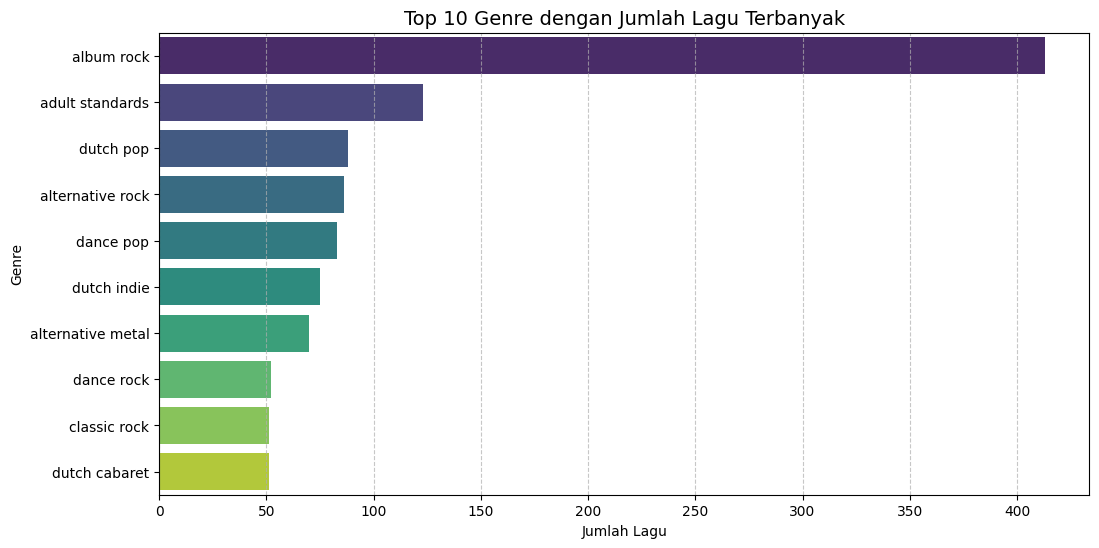

In [ ]:
top_genres = lagu_data['Top Genre'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette="viridis"
)
plt.title('Top 10 Genre dengan Jumlah Lagu Terbanyak', fontsize=14)
plt.xlabel('Jumlah Lagu')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Pertanyaan 2: Bagaimana distribusi persentase dari setiap kategori tempo pada lagu?

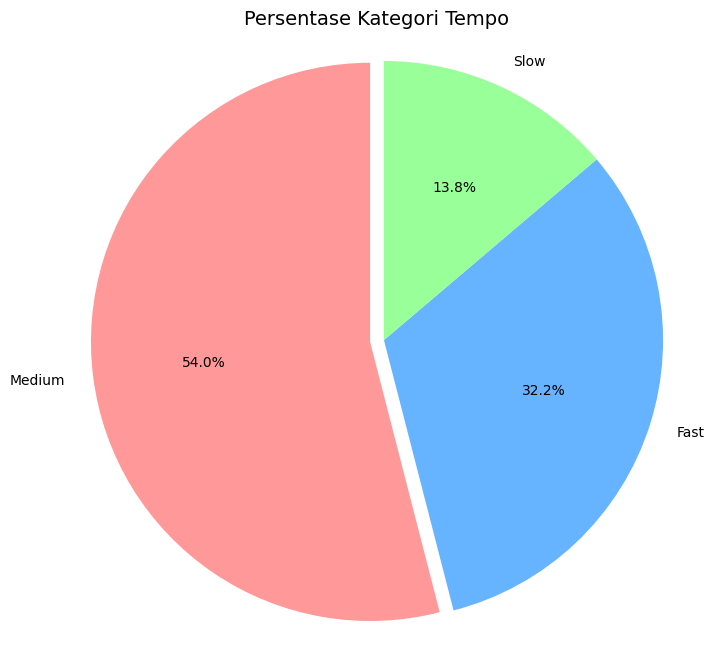

In [ ]:
# Hitung persentase kategori tempo
tempo_dist = lagu_data['Tempo_Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(
    tempo_dist,
    labels=tempo_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99'],
    explode=(0.05, 0, 0)
)
plt.title('Persentase Kategori Tempo', fontsize=14)
plt.axis('equal')
plt.show()

## Pertanyaan 3: Artis mana saja yang memiliki rata-rata energy lagu tertinggi?

<ipython-input-82-b415366cdf8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


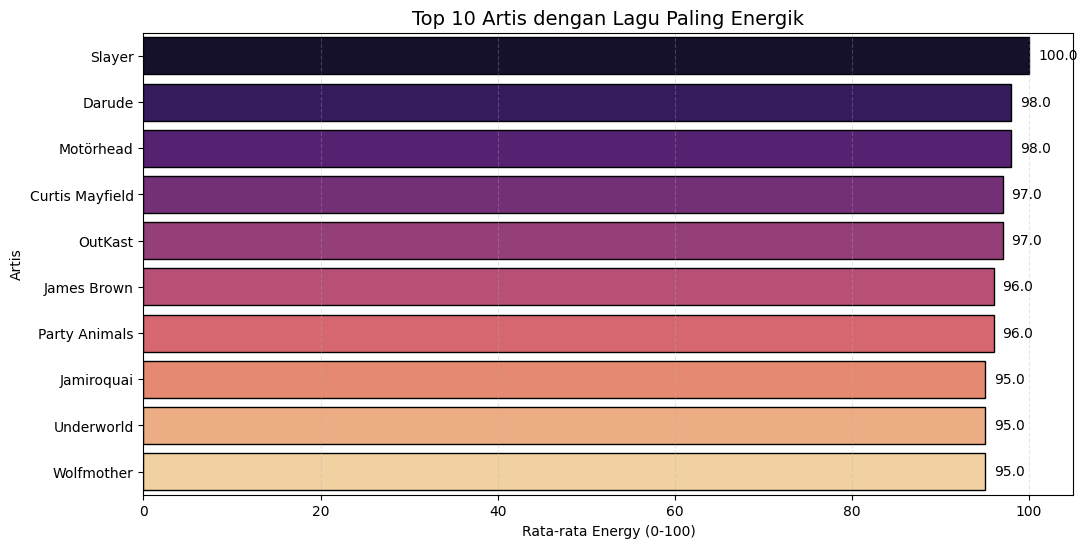

In [ ]:
top_energy = lagu_data.groupby('Artist')['Energy'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_energy.values,
    y=top_energy.index,
    palette="magma",
    edgecolor="black"
)
plt.title('Top 10 Artis dengan Lagu Paling Energik', fontsize=14)
plt.xlabel('Rata-rata Energy (0-100)')
plt.ylabel('Artis')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Tambah label nilai
for i, v in enumerate(top_energy.values):
    plt.text(v + 1, i, f"{v:.1f}", va='center')

plt.show()

## Pertanyaan 4: Artis mana saja yang memiliki rata-rata danceability dan popularitas tertinggi?

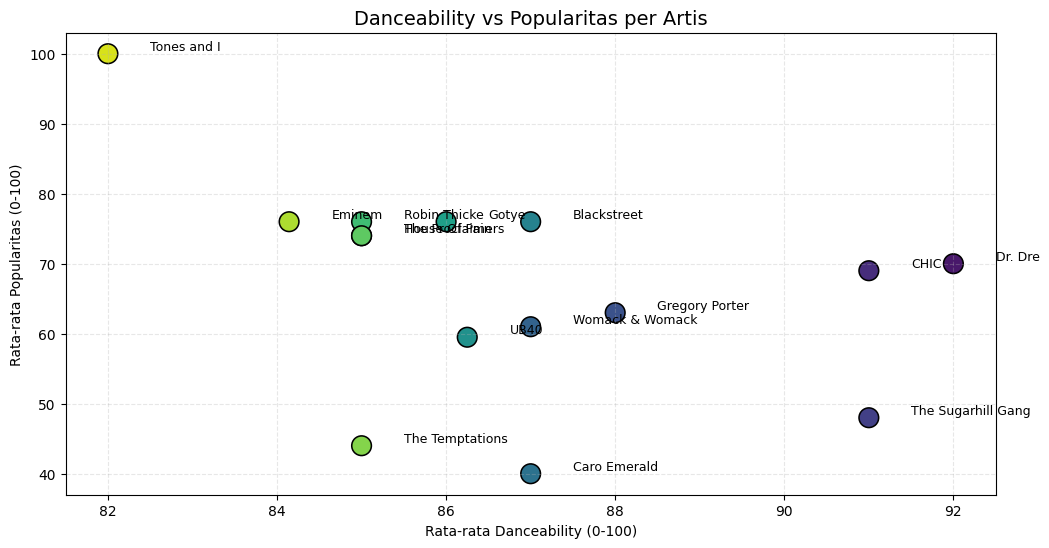

In [ ]:
# Hitung rata-rata danceability dan popularity per artis
artist_stats = lagu_data.groupby('Artist').agg({
    'Danceability': 'mean',
    'Popularity': 'mean'
}).sort_values('Danceability', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=artist_stats,
    x='Danceability',
    y='Popularity',
    hue=artist_stats.index,
    palette="viridis",
    s=200,
    edgecolor="black"
)
plt.title('Danceability vs Popularitas per Artis', fontsize=14)
plt.xlabel('Rata-rata Danceability (0-100)')
plt.ylabel('Rata-rata Popularitas (0-100)')
plt.grid(linestyle='--', alpha=0.3)

# Tambah label artis
for artist in artist_stats.index:
    plt.text(
        x=artist_stats.loc[artist, 'Danceability'] + 0.5,
        y=artist_stats.loc[artist, 'Popularity'] + 0.5,
        s=artist,
        fontsize=9
    )

plt.legend([], [], frameon=False)
plt.show()

## Pertanyaan 5 : Genre apa yang memiliki rata-rata tempo tertinggi?

<ipython-input-90-bb20c766d137>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_tempo.values, y=genre_tempo.index, palette="magma")


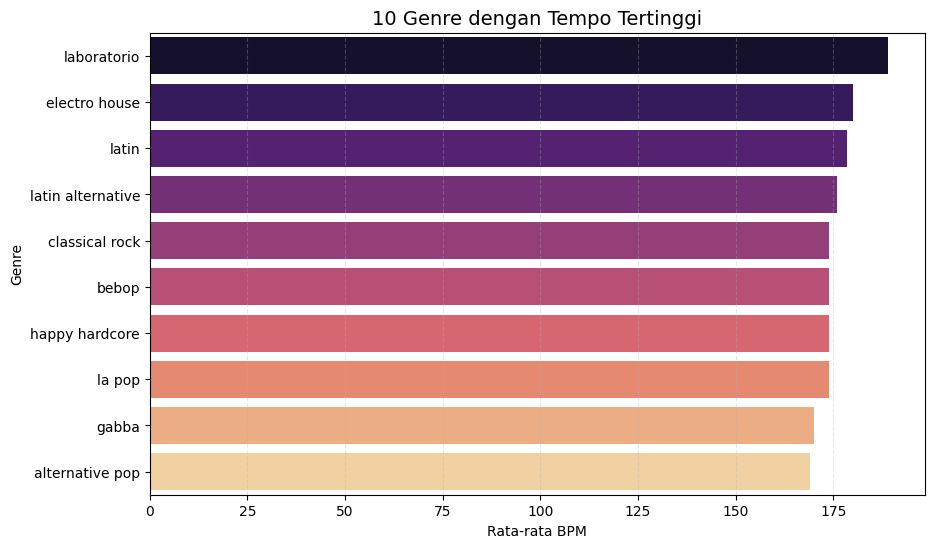

In [ ]:
genre_tempo = lagu_data.groupby('Top Genre')['Beats Per Minute (BPM)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_tempo.values, y=genre_tempo.index, palette="magma")
plt.title('10 Genre dengan Tempo Tertinggi', fontsize=14)
plt.xlabel('Rata-rata BPM')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


## Pertanyaan 6:Lagu dari genre apa yang paling sering muncul dalam dataset?

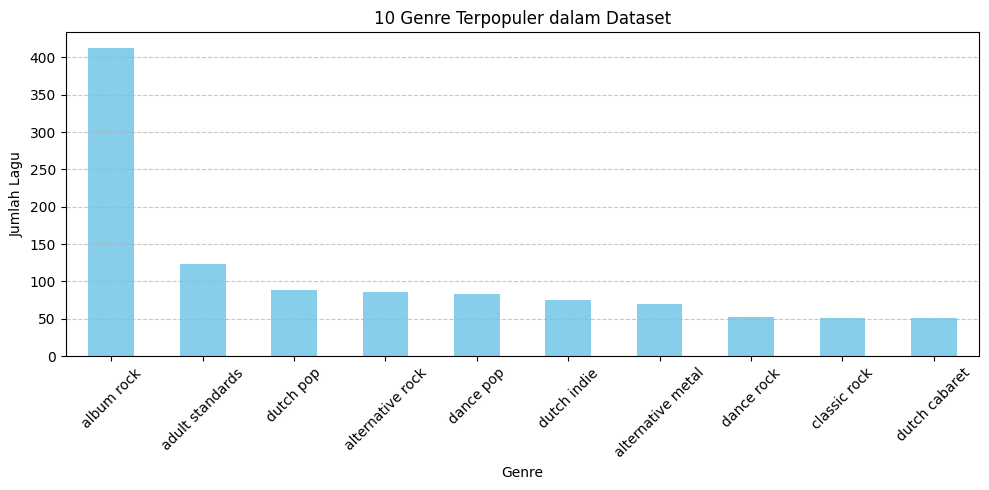

In [ ]:
lagu_data['Top Genre'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('10 Genre Terpopuler dalam Dataset')
plt.xlabel('Genre')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Pertanyaan 7:Artis dengan jumlah lagu terbanyak lagu dan popularitas?

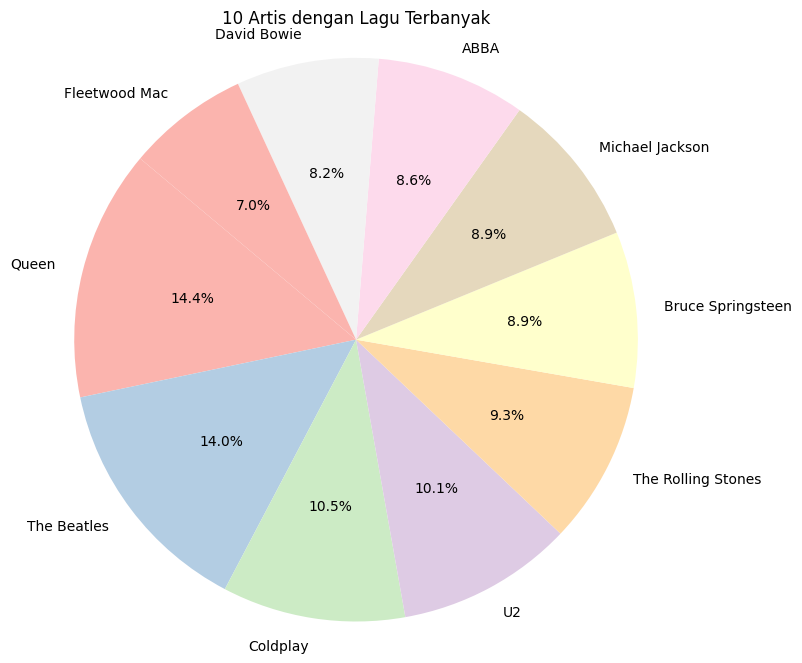

In [ ]:
counts = lagu_data['Artist'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('10 Artis dengan Lagu Terbanyak')
plt.axis('equal')  # supaya lingkaran benar-benar bulat
plt.show()

## Pertanyaan 8: Siapa penyanyi dengan rata-rata durasi lagu terpanjang?

<ipython-input-93-76d9ebd3c977>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_per_artist.values, y=duration_per_artist.index, palette='cubehelix')


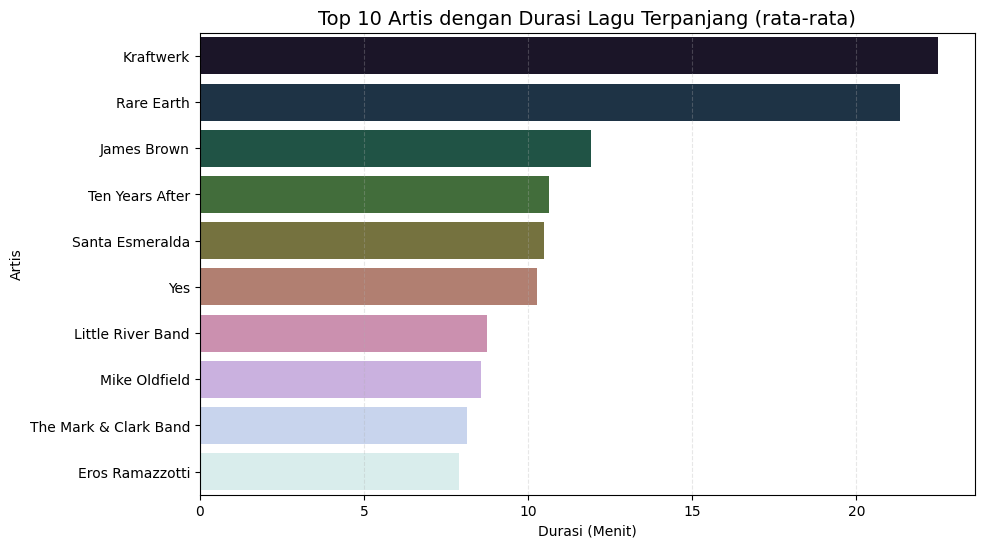

In [ ]:
duration_per_artist = lagu_data.groupby('Artist')['Length (Duration)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=duration_per_artist.values, y=duration_per_artist.index, palette='cubehelix')
plt.title('Top 10 Artis dengan Durasi Lagu Terpanjang (rata-rata)', fontsize=14)
plt.xlabel('Durasi (Menit)')
plt.ylabel('Artis')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


## Pertanyaan 9: Bagaimana tren popularitas lagu dari tahun ke tahun?

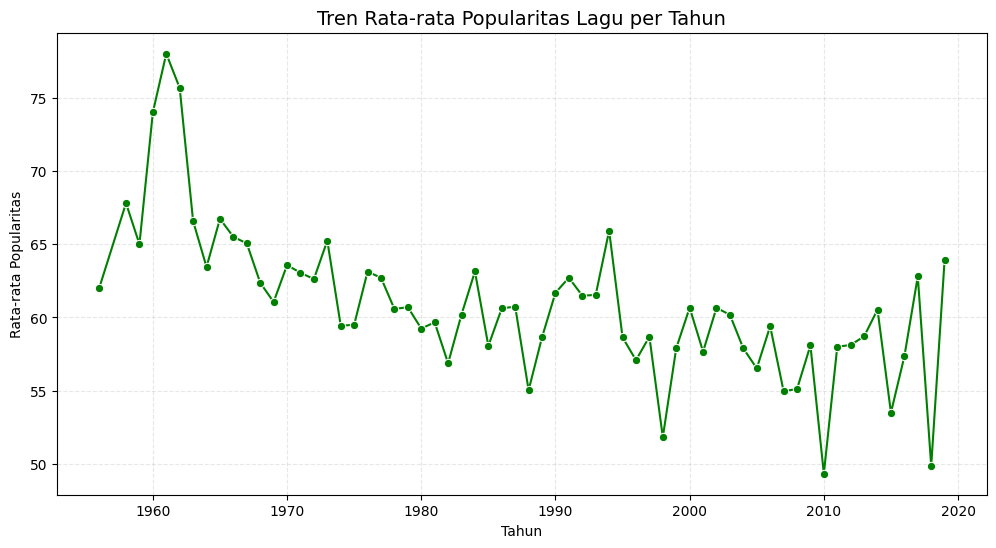

In [ ]:
popularity_trend = lagu_data.groupby('Year')['Popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_trend.index, y=popularity_trend.values, marker='o', color='green')
plt.title('Tren Rata-rata Popularitas Lagu per Tahun', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Popularitas')
plt.grid(linestyle='--', alpha=0.3)
plt.show()


## Pertannyaan 10: Distribusi Lagu berdasarkan Tempo Category


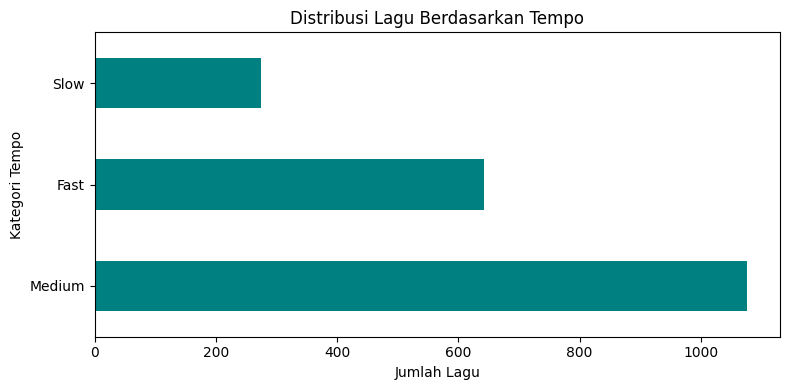

In [ ]:
counts = lagu_data['Tempo_Category'].value_counts()

plt.figure(figsize=(8,4))
counts.plot(kind='barh', color='teal')
plt.title('Distribusi Lagu Berdasarkan Tempo')
plt.xlabel('Jumlah Lagu')
plt.ylabel('Kategori Tempo')
plt.tight_layout()
plt.show()
